<a href="https://colab.research.google.com/github/YouFoundJK/Advanced-ML/blob/main/1_Titanic_Explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setting up A folder in drive as working directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
if os.getcwd() != '/content/drive/My Drive/Kaggle':
  os.chdir ('./drive/MyDrive/Kaggle')
! ls

kaggle.json  Titanic  titanic.zip


Upload the kaggle.json file containing login details for dowloading kaggle dataset

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle.json
! kaggle competitions download -c titanic
! mkdir Titanic
! unzip -n titanic.zip -d Titanic  # replace -n by -o to overwrite unzipping

mkdir: cannot create directory ‘/root/.kaggle’: File exists
chmod: cannot access '/root/.kaggle.json': No such file or directory
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘Titanic’: File exists
Archive:  titanic.zip


### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv("Titanic/train.csv")
test_df = pd.read_csv("Titanic/test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# print the shape of the files
print("* Shape of train dataset:", train_df.shape)
print("* Shape of test dataset:", test_df.shape)

* Shape of train dataset: (891, 12)
* Shape of test dataset: (418, 11)


**Survived:** Our target column holds two values (0 = not survived, 1 = Survived)

**Pclass:** Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

**Sex:** whether a man or a woman

**Age:** Age of passengers in years

**SibSp:** number of siblings / spouses aboard the Titanic.

**Parch:** number of parents / children aboard the Titanic.

**Ticket:** Ticket number.

**Fare:** Passenger fare.

**Cabin:** Cabin number.

**Embarked: **Port of Embarkation includes (C = Cherbourg, Q = Queenstown, S = Southampton)

# Overview and Cleaning Data

Processing data requires expert specific knowledge on the study.

In [ ]:
# Check the Unique values of each Attribute
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
# Summary
print('* Train dataset info :')
train_df.info()
print('_' *40)
print('* Test dataset info :')
test_df.info()

* Train dataset info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
* Test dataset info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------

In [ ]:
#see a summary of the training df
train_df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Numerical Features**: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)

**Categorical Features**: Survived, Sex, Embarked, Pclass

**Alphanumeric Features**: Ticket, Cabin

## Missing values in **data**

In [ ]:
def missing_data(train_df,test_df):
  null_df = pd.DataFrame(columns=['names', 'train null', 'test null'])
  null_df = null_df.append({'names': 'TOTAL', 'train null': len(train_df), 'test null': len(test_df)}, ignore_index=True)
  for i in test_df.columns:
    train_null_ratio = train_df[i].isna().sum() / len(train_df) * 100
    test_null_ratio = test_df[i].isna().sum() / len(test_df) * 100
    if train_null_ratio > 0 or test_null_ratio > 0:
      null_df = null_df.append({'names': i, 'train null': train_df[i].isna().sum(), 'test null': test_df[i].isna().sum()}, ignore_index=True)

  return null_df

missing_data(train_df,test_df)

,names,train null,test null
0,TOTAL,891,418
1,Age,177,86
2,Fare,0,1
3,Cabin,687,327
4,Embarked,2,0


### Replacing missing values

**Embarked Feature**

In [ ]:
# Embarked feature contains a few null values; we can replace these with the mode value "S"
misVal_embarked = train_df.Embarked.mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(misVal_embarked)

**Fare Feature**

We can see there is one missing value in the fare column. For more accuracy, use the mean function for all data have Embarked == "S" and Sex == "male"

In [ ]:
test_df[test_df.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
value_mis = test_df[(test_df.Embarked == "S") &
                    (test_df.Sex == "male")].Fare.mean()

## replace the test.fare null values with test.fare mean
test_df.Fare.fillna(value_mis, inplace=True)

**Cabin feature**

Since there isn't much more information that can be gleaned from the Cabin feature, I will begin off by removing it.

In [ ]:
# Cabin Feature is removed

train_df= train_df.drop(['Cabin'],axis=1)
test_df=test_df.drop(['Cabin'],axis=1)

In [ ]:
# Recheck for Missing data

missing_data(train_df,test_df)

,names,train null,test null
0,TOTAL,891,418
1,Age,177,86


**Age Feature**

We still have a sigificant amount of ages missing, now this may be fixed by:

1. Ignore those and let the model take care of it.
2. Remove the age column completely from both test and train
3. use the all other data and model these missing ages using ML.

# Data Visualisation

To see the dependancies of y on various features

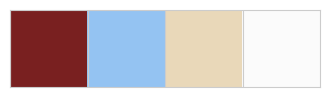

In [ ]:
import seaborn as sns

sns.palplot(['#792020','#94C3F2','#E9D8B9','#fbfbfb'])

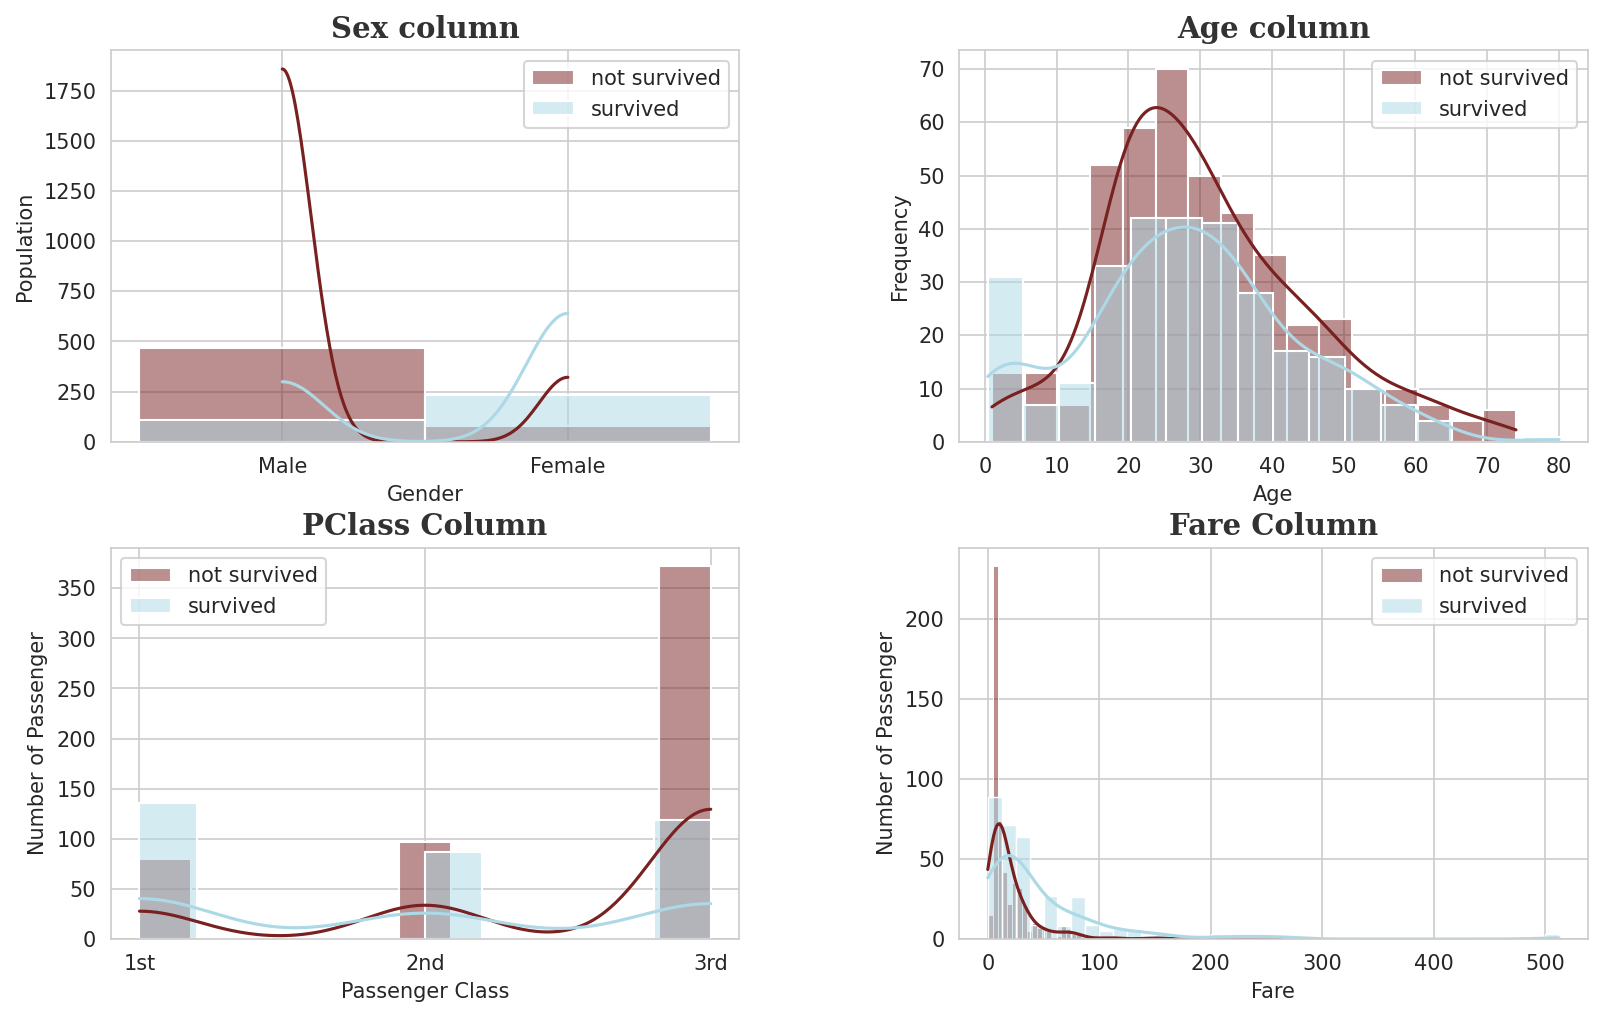

In [ ]:
colors = ['#792020', 'lightblue']
fig = plt.figure(figsize=(20,12),dpi=150)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax = [[fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1])],[fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1])]]


ax[0][0].set_title('Sex column', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.histplot(train_df.loc[(train_df['Survived'] == 0),'Sex'] , color=colors[0],label='not survived',kde=True, ax=ax[0][0])
sns.histplot(train_df.loc[(train_df['Survived'] == 1),'Sex'] , color=colors[1],label='survived',kde=True, ax=ax[0][0])
ax[0][0].set_xticklabels(('Male','Female'), rotation=0)
ax[0][0].set_xlabel("Gender", rotation=0)
ax[0][0].set_ylabel("Population", rotation=90)
ax[0][0].legend()


ax[0][1].set_title('Age column', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.histplot(train_df.loc[(train_df['Survived'] == 0),'Age'] , color=colors[0],label='not survived',kde=True, ax=ax[0][1])
sns.histplot(train_df.loc[(train_df['Survived'] == 1),'Age'] , color=colors[1], label='survived', kde=True, ax=ax[0][1])
ax[0][1].set_xlabel("Age", rotation=0)
ax[0][1].set_ylabel("Frequency", rotation=90)
ax[0][1].legend()


ax[1][0].set_title('PClass Column', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.histplot(train_df.loc[(train_df['Survived'] == 0),'Pclass'] , color=colors[0],label='not survived',kde=True, ax=ax[1][0])
sns.histplot(train_df.loc[(train_df['Survived'] == 1),'Pclass'] , color=colors[1],label='survived',kde=True, ax=ax[1][0])
ax[1][0].set_xticks(sorted(train_df.Pclass.unique()), ('1st', '2nd', '3rd'))
ax[1][0].set_xlabel("Passenger Class")
ax[1][0].set_ylabel("Number of Passenger")
ax[1][0].legend()

ax[1][1].set_title('Fare Column', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.histplot(train_df.loc[(train_df['Survived'] == 0),'Fare'] , color=colors[0],label='not survived',kde=True, ax=ax[1][1])
sns.histplot(train_df.loc[(train_df['Survived'] == 1),'Fare'] , color=colors[1],label='survived',kde=True, ax=ax[1][1])
# ax[1][1].set_xticks(sorted(train_df.Pclass.unique()), ('1st', '2nd', '3rd'))
ax[1][1].set_xlabel("Fare")
ax[1][1].set_ylabel("Number of Passenger")
ax[1][1].legend()

plt.show()

Can see clear correlation between 3rd class and survival rate.

## Linear Correlation Matrix

Correlation matrix only represents linear correlations, and doen't coount NaN values (Hence important to clean the input beforehand).

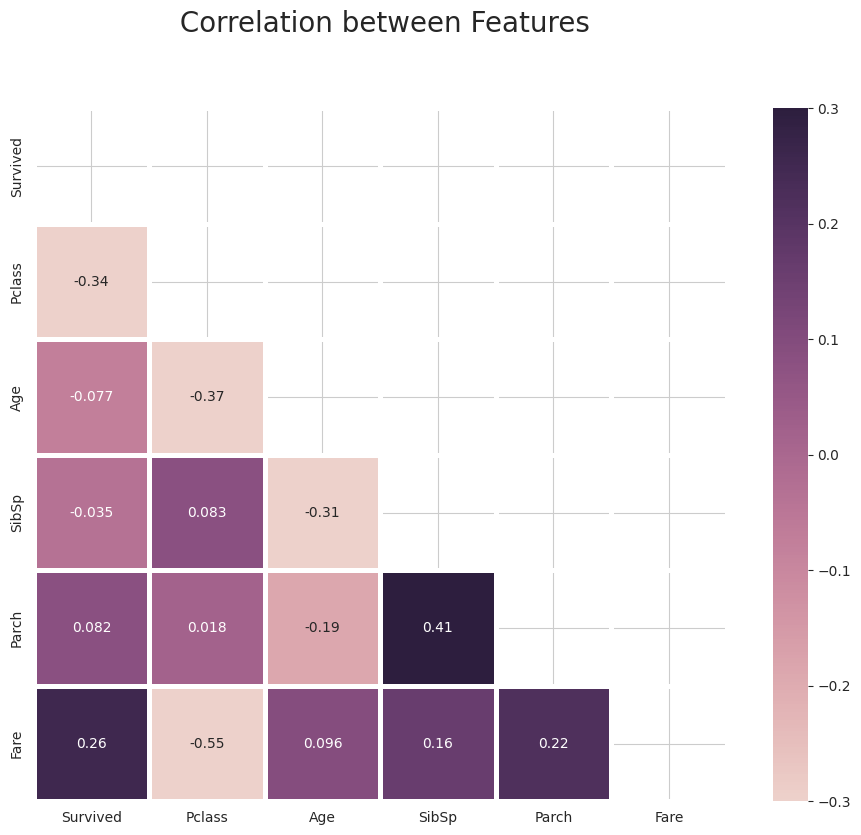

In [ ]:
matrix_cols = ["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
df_corr = train_df[matrix_cols].corr()

fig,ax = plt.subplots(figsize=(12,9))
sns.set_style('whitegrid')

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr, mask=mask, cmap= sns.cubehelix_palette(as_cmap=True), annot=True, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
ax.set_title(' Correlation between Features',  y = 1.03,fontsize = 20, pad = 40)

plt.show()

## Similarity between test and training data set

Now let's see how the train and test sets looks like this is a useful technique the code from Josh wonderful notebook

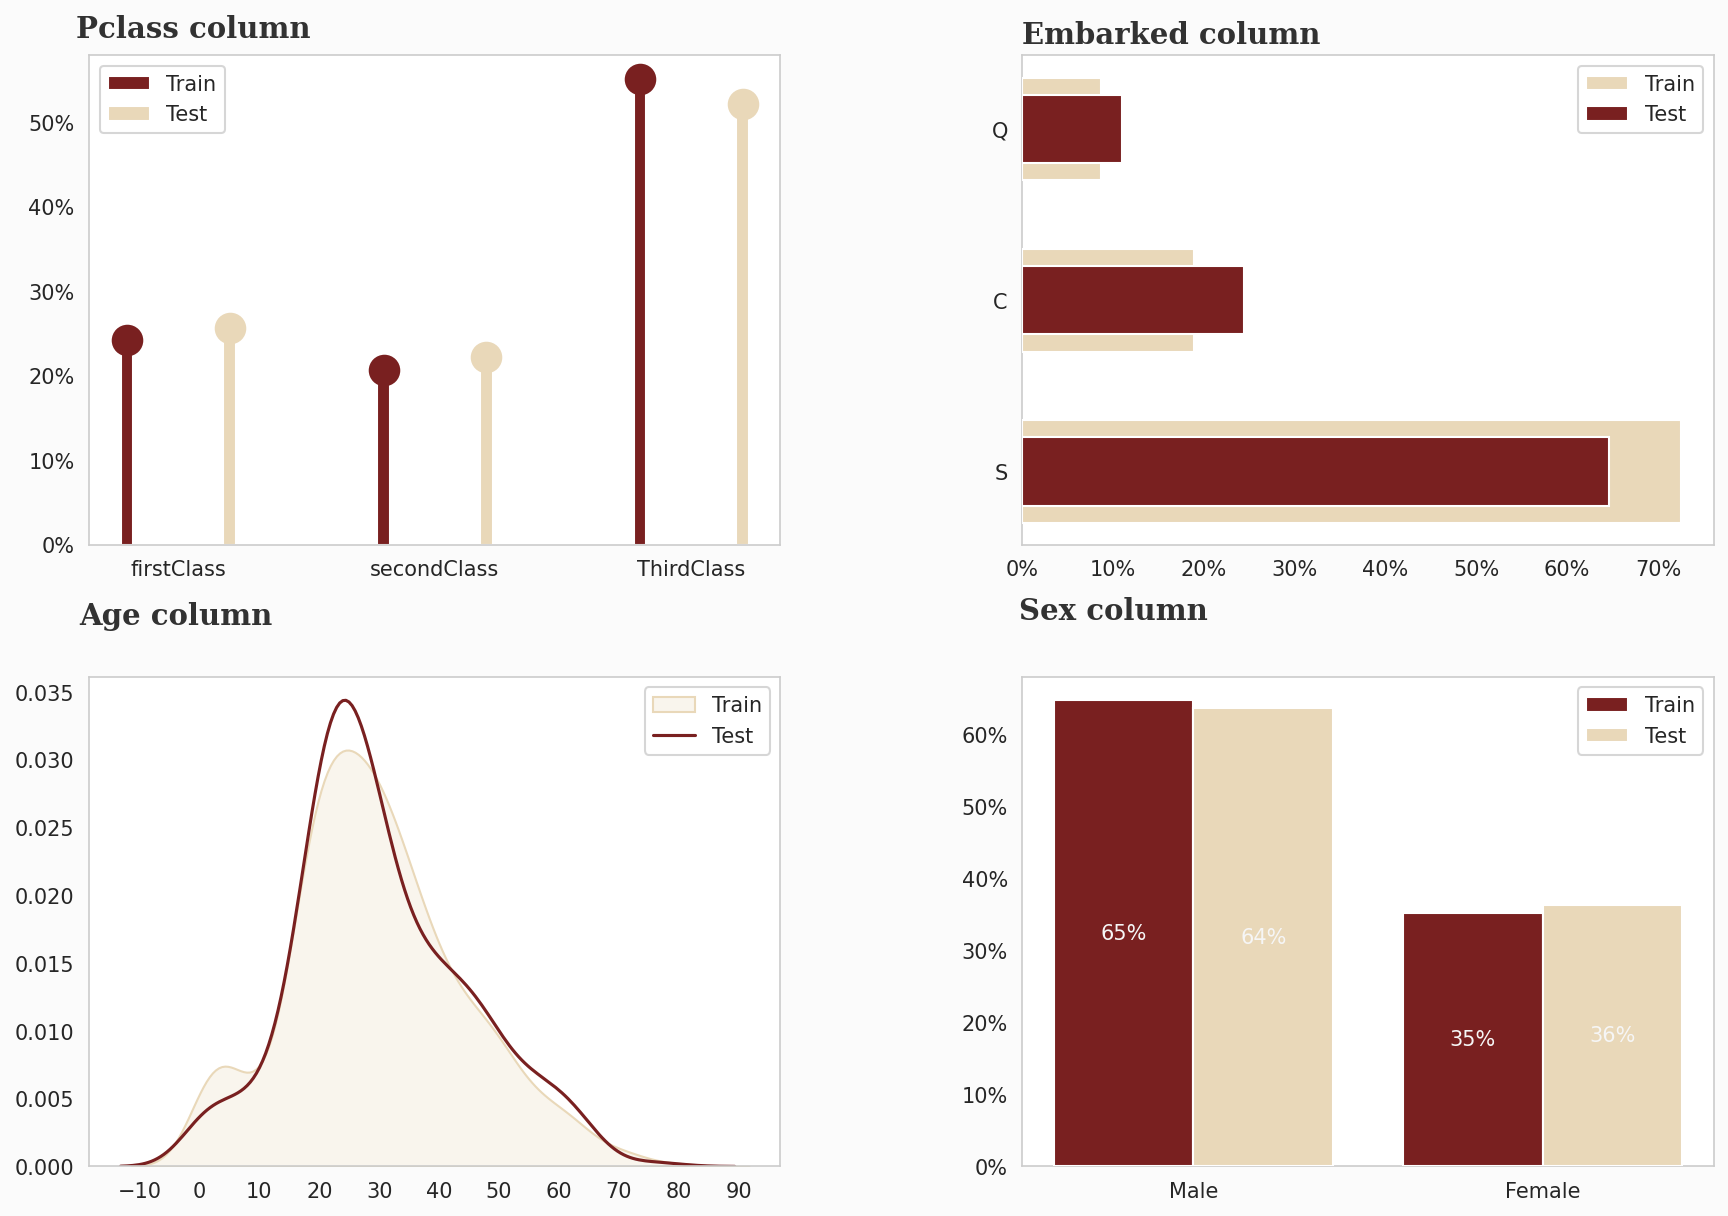

In [ ]:
background_color = "#fbfbfb"

fig = plt.figure(figsize=(22,15),dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])


PclassN = ('firstClass', 'secondClass', 'ThirdClass')
# Ax0 - Pclass
train = pd.DataFrame(train_df["Pclass"].value_counts())
train["Percentage"] = train["Pclass"].apply(lambda x: x/sum(train["Pclass"])*100)
train = train.sort_index()

test = pd.DataFrame(test_df["Pclass"].value_counts())
test["Percentage"] = test["Pclass"].apply(lambda x: x/sum(test["Pclass"])*100)
test = test.sort_index()

ax0.bar(np.arange(len(train.index)), height=train["Percentage"], zorder=1, color="#792020", width=0.05, label="Train")
ax0.scatter(np.arange(len(train.index)), train["Percentage"], zorder=3, s=200, color="#792020")

ax0.bar(np.arange(len(test.index))+0.4, height=test["Percentage"], zorder=1, color="#E9D8B9",width=0.05, label="Test")
ax0.scatter(np.arange(len(test.index))+0.4, test["Percentage"], zorder=3, s=200, color="#E9D8B9")

ax0.text(-0.2, 60, 'Pclass column', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax0.set_xticks(np.arange(len(train.index))+0.4 / 2)
ax0.set_xticklabels(PclassN,rotation=0)
ax0.grid(False)
ax0.legend()


fare_order = ['S','Q','C']
# Ax1 - Fare
train = pd.DataFrame(train_df["Embarked"].value_counts())
train["Percentage"] = train["Embarked"].apply(lambda x: x/sum(train["Embarked"])*100).loc[fare_order]
test = pd.DataFrame(test_df["Embarked"].value_counts())
test["Percentage"] = test["Embarked"].apply(lambda x: x/sum(test["Embarked"])*100).loc[fare_order]

ax1.text(0, 2.5, 'Embarked column', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(train.index, train['Percentage'], color="#E9D8B9", zorder=3, height=0.6, label="Train")
ax1.barh(test.index, test['Percentage'], color="#792020", zorder=3, height=0.4, label="Test")
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))
ax1.grid(False)
ax1.legend()


ax2.grid(color='#E9D8B9', linestyle=':', axis='y', zorder=2,  dashes=(1,5))
train = pd.DataFrame(train_df["Age"])
test = pd.DataFrame(test_df["Age"])

sns.kdeplot(train["Age"], ax=ax2,color="#E9D8B9",shade=True, label="Train")
sns.kdeplot(test["Age"], ax=ax2, color="#792020",  label="Test")

ax2.text(-20 ,0.04, 'Age column ', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.xaxis.set_major_locator(mtick.MultipleLocator(10))
ax2.yaxis.set_major_locator(mtick.AutoLocator())
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.grid(False)
ax2.legend()


train = pd.DataFrame(train_df["Sex"].value_counts())
train["Percentage"] = train["Sex"].apply(lambda x: x/sum(train["Sex"])*100)
test = pd.DataFrame(test_df["Sex"].value_counts())
test["Percentage"] = test["Sex"].apply(lambda x: x/sum(test["Sex"])*100)
x = np.arange(len(train))

ax3.text(-0.3, 76, 'Sex column ', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.bar(x, height=train["Percentage"], zorder=3, color="#792020", width=0.4,label="Train" )
ax3.bar(x+0.4, height=test["Percentage"], zorder=3, color="#E9D8B9", width=0.4, label="Test")
ax3.set_xticks(x + 0.4 / 2)
ax3.set_xticklabels(['Male','Female'])
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax3.grid(False)
ax3.legend()

for i,j in zip([0, 1, 2], train["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1, 2], test["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')


plt.show()

# Data Polishing

1. Hot encode in float all alphanumericals for DecisionTree to work.

In [ ]:
train_df['Embarked'] = train_df['Embarked'].replace(['C', 'Q', 'S'], [0, 1, 2])
test_df['Embarked'] = test_df['Embarked'].replace(['C', 'Q', 'S'], [0, 1, 2])

In [ ]:
# Converting Sex columns to  numerical values

train_df["Sex"] = [1 if x=="male" else 0 for x in train_df["Sex"]]
test_df["Sex"] = [1 if x=="male" else 0 for x in test_df["Sex"]]

# Model For predicting Age Feature

A simple linear regression model can be used to predic the age. Features like 'PassengerId','Name', 'Ticket', 'Embarked' is irrelevant for this extrapolation.

Two models may be thought of:

1. Combine the test and train dataset, at the expense of igoring the relation between age and survival, as test set doesn't have age.

2. Use only train dataset.

In [ ]:
# merge the two data sets
data = pd.concat([train_df.drop(["Survived"],axis=1, inplace=False),test_df], ignore_index=False)

print("* Shape of train dataset:", train_df.shape)  # (891, 11)
print("* Shape of test dataset:", test_df.shape)    # (418, 10)
print("* Shape of data :", data.shape)              # (1309, 10)

* Shape of train dataset: (891, 11)
* Shape of test dataset: (418, 10)
* Shape of data : (1309, 10)


In [ ]:
data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
# drop unnecessary columns
data = data.drop(['PassengerId','Name', 'Ticket', 'Embarked'], axis=1)

To split the dataset into two:
1. test_data: where all rows with age as NaN is stored
2. data: where all rows with NaN for age is removed.

## Model 1

train_df and test_df are replaced after filling in NaN in 'Age'.

In [ ]:
test_data = data[data["Age"].isnull()]
data.dropna(subset=['Age'], inplace=True)

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
y_train = data["Age"]
X_train = data.drop("Age", axis=1)
X_test = test_data.drop("Age", axis=1)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred)

data = pd.concat([train_df.drop(["Survived"],axis=1, inplace=False),test_df], ignore_index=False)
[data.Age.fillna(i, inplace=True) for i in y_pred]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [ ]:
## Separating train and test from all_data.
Y_train = train_df['Survived']

train_df = data[:891]   # Does't include 'Survived'
test_df = data[891:]

In [ ]:
X_train = train_df.drop(["Name","PassengerId","Ticket"], axis=1)
X_test  = test_df.drop(["Name","PassengerId","Ticket"], axis=1)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=1)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# Accuracy
acc_decision_tree = round(model.score(X_train, Y_train) * 100, 2)

results = print ('Model:' "RandomForestClassifier \n" ,'Score:',acc_decision_tree)
results

Model:RandomForestClassifier 
 Score: 91.13


In [ ]:
# To get the PassengerID and export

test_df = pd.read_csv("Titanic/test.csv")
print(test_df.shape, Y_pred.shape)
subm_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': Y_pred})
subm_df

(418, 11) (418,)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
subm_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': Y_pred})
subm_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### Plotting the tree
works only for Decision Tree

In [ ]:
# from sklearn.tree import plot_tree

# plt.figure(figsize=(30,40))
# graph_tree = plot_tree(model,feature_names = ['Pclass','Sex','Age', 'SibSp', 'Parch','Fare', 'Embarked'],
#                         class_names = ['Survived','Not Survived'],
#                         filled=True,rounded=True,fontsize = 20)